In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

final_persona_char_movie_role = pd.read_csv('../Data/final_persona_char_movie_role.csv')

# Calculate the total number of main and side characters
total_main_characters = final_persona_char_movie_role[final_persona_char_movie_role['character_type'] == 'main'].shape[0]
total_side_characters = final_persona_char_movie_role[final_persona_char_movie_role['character_type'] == 'side'].shape[0]

# Analyze the relationship between "persona_code" and "character_type"
persona_character_counts = final_persona_char_movie_role.groupby(['persona_code', 'character_type']).size().unstack()

# Calculate the percentages for each persona separately
persona_character_percentages_main = persona_character_counts['main'] / total_main_characters * 100
persona_character_percentages_side = persona_character_counts['side'] / total_side_characters * 100

# Combine the percentages for both main and side characters
combined_percentages = pd.concat([persona_character_percentages_main, persona_character_percentages_side], axis=1, keys=['Main', 'Side'])

# Reset index to prepare for Plotly
combined_percentages_reset = combined_percentages.reset_index()

# Melt the DataFrame for Plotly
melted_df = pd.melt(combined_percentages_reset, id_vars='persona_code', var_name='Character Type', value_name='Percentage')

# Create an interactive grouped bar plot with Plotly Express
fig = px.bar(
    melted_df,
    x='persona_code',
    y='Percentage',
    color='Character Type',
    barmode='group',
    title='Personas for Main and Side Characters (Percentage)',
    labels={'Percentage': 'Percentage', 'persona_code': 'Persona Code'},
)

# Show the plot
fig.show()




In [4]:
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is named "final_persona_char_movie_role"
# Replace 'your_data.csv' with the actual file path or method you use to read your data
# For example: final_persona_char_movie_role = pd.read_csv('your_data.csv')

# Count occurrences for each combination of 'movie_release_year', 'persona_code', and 'character_type'
data_counts = final_persona_char_movie_role.groupby(['movie_release_year', 'persona_code', 'character_type']).size().reset_index(name='count')

# Get the top 5 personas for both main and side characters
top5_main_personas = data_counts[data_counts['character_type'] == 'main'].groupby('persona_code')['count'].sum().nlargest(5).index
top5_side_personas = data_counts[data_counts['character_type'] == 'side'].groupby('persona_code')['count'].sum().nlargest(5).index

# Filter the data for the top 5 personas for both main and side characters
main_top5_data = data_counts[(data_counts['character_type'] == 'main') & (data_counts['persona_code'].isin(top5_main_personas))]
side_top5_data = data_counts[(data_counts['character_type'] == 'side') & (data_counts['persona_code'].isin(top5_side_personas))]

# Combine main and side data
combined_data = pd.concat([main_top5_data, side_top5_data])

# Calculate the total count for each year and character type
total_counts = data_counts.groupby(['movie_release_year', 'character_type'])['count'].sum().reset_index()

# Calculate the proportion of each persona among all 50 personas
data_counts['proportion_all'] = data_counts['count'] / total_counts['count']

# Merge total counts with the combined_data to calculate proportions
combined_data = pd.merge(combined_data, total_counts, on=['movie_release_year', 'character_type'], suffixes=('', '_total'))

# Calculate the proportion of each persona among the top 5 personas
combined_data['proportion'] = combined_data['count'] / combined_data['count_total']

# Normalize the proportions of the top 5 personas to make them sum up to 1
combined_data['proportion_normalized'] = combined_data.groupby(['movie_release_year', 'character_type'])['proportion'].transform(lambda x: x / x.sum())

# Create a stacked area chart with central alignment
fig = px.area(
    combined_data,
    x='movie_release_year',
    y='proportion_normalized',
    color='persona_code',
    facet_col='character_type',
    facet_col_wrap=2,  # Set the number of columns in the facet grid
    labels={'proportion_normalized': 'Proportion (Normalized)'},
    title='Proportion of Top 5 Personas (Normalized) for Main and Side Characters Over the Years',
    range_x=[1930, combined_data['movie_release_year'].max()],  # Set the starting point of the x-axis
    range_y=[0, 1]  # Set the y-axis range
)

# Show the chart
fig.show()


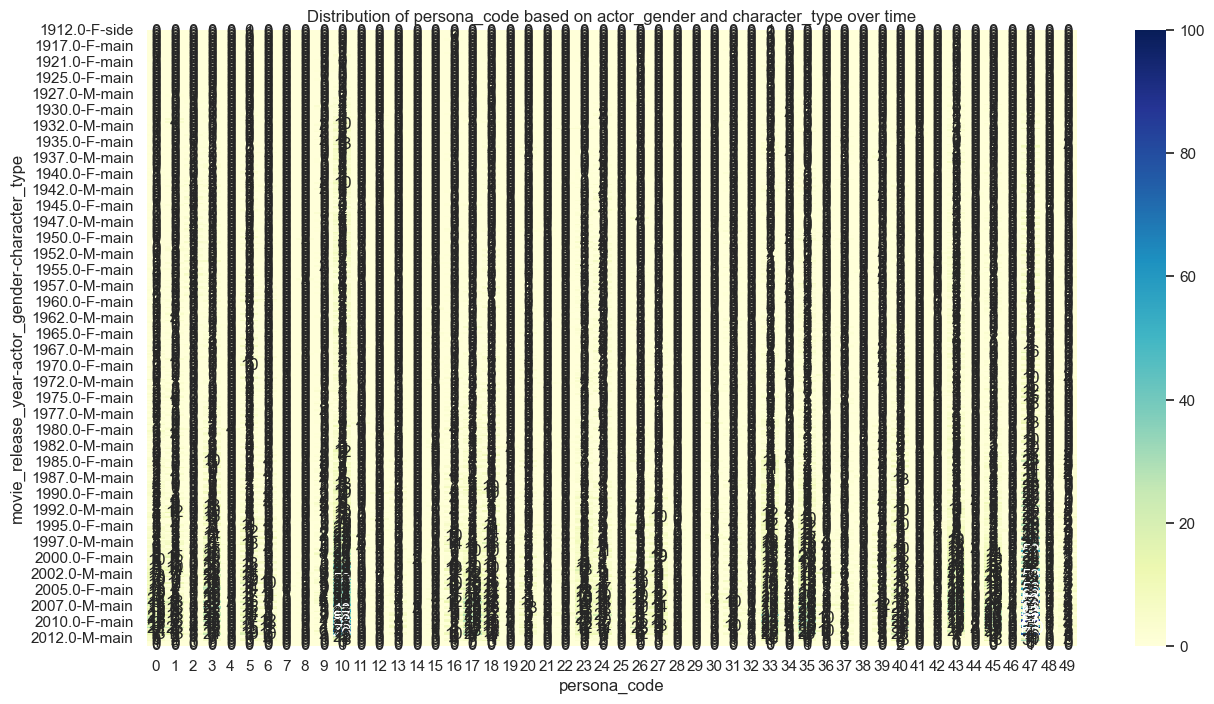

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_persona_char_movie_role' is your DataFrame
# Replace it with your actual DataFrame name

# Example DataFrame
# final_persona_char_movie_role = ...

# Group by 'movie_release_year', 'actor_gender', and 'character_type'
grouped_data = final_persona_char_movie_role.groupby(['movie_release_year', 'actor_gender', 'character_type'])['persona_code'].value_counts().unstack(fill_value=0)

# Plotting using seaborn
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(15, 8))

# Create a heatmap
sns.heatmap(grouped_data, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Distribution of persona_code based on actor_gender and character_type over time')
plt.show()


In [17]:
import pandas as pd
import plotly.express as px

# Assuming 'final_persona_char_movie_role' is your DataFrame
# Replace it with your actual DataFrame name

# Example DataFrame
# final_persona_char_movie_role = ...

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(
    final_persona_char_movie_role,
    x='movie_release_year',
    y='persona_code',
    color='actor_gender',
    facet_col='character_type',
    title='Distribution of persona_code over time',
    labels={'persona_code': 'Persona Code', 'movie_release_year': 'Movie Release Year'},
)

# Update layout to improve visibility
fig.update_layout(
    height=600,
    showlegend=True,
)

# Show the interactive plot
fig.show()


In [18]:
import pandas as pd
import plotly.express as px

# Assuming 'final_persona_char_movie_role' is your DataFrame
# Replace it with your actual DataFrame name

# Example DataFrame
# final_persona_char_movie_role = ...

# Create a bar chart with a horizontal scrollbar
fig = px.bar(
    final_persona_char_movie_role,
    x='persona_code',
    y='count',  # Assuming you have a count column indicating the frequency of each persona_code
    color='actor_gender',
    facet_col='character_type',
    title='Top 5 Personas Over Time',
    labels={'count': 'Count'},
    animation_frame='movie_release_year',
    category_orders={'actor_gender': ['M', 'F'], 'character_type': ['main', 'side']},
)

# Update layout to improve visibility
fig.update_layout(
    height=600,
    showlegend=True,
)

# Show the interactive plot
fig.show()


ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Wikipedia movie ID', 'character', 'pagerank', 'character_type', 'full_name', 'freebase_char_map', 'wikipedia_movie_id', 'movie_name', 'related_name', 'token', 'persona_code', 'persona_distribution', 'freebase_movie_id', 'character_name', 'actor_dob', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name', 'actor_age_release', 'freebase_char_id', 'freebase_actor_id', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_genres_cleaned', 'movie_countries_cleaned', 'movie_languages_cleaned', 'movie_release_year'] but received: count

In [19]:
import pandas as pd
import plotly.express as px

# Assuming 'final_persona_char_movie_role' is your DataFrame
# Replace it with your actual DataFrame name

# Example DataFrame
# final_persona_char_movie_role = ...

# Calculate the count of each persona_code
persona_counts = final_persona_char_movie_role.groupby(['movie_release_year', 'actor_gender', 'character_type', 'persona_code']).size().reset_index(name='count')

# Filter the top 5 personas based on user selections
filtered_data = persona_counts[(persona_counts['actor_gender'] == 'M') & (persona_counts['character_type'] == 'main')]

# Sort the data to get the top 5 personas
top_5_personas = filtered_data.sort_values(by='count', ascending=False).head(5)

# Create a bar chart with a horizontal scrollbar
fig = px.bar(
    top_5_personas,
    x='persona_code',
    y='count',
    color='actor_gender',
    animation_frame='movie_release_year',
    title='Top 5 Personas Over Time',
    labels={'count': 'Count'},
    category_orders={'actor_gender': ['M', 'F'], 'character_type': ['main', 'side']},
)

# Update layout to improve visibility
fig.update_layout(
    height=600,
    showlegend=True,
)

# Show the interactive plot
fig.show()


In [11]:
import pandas as pd
import ast
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.express as px

# Assuming your DataFrame is named "final_persona_char_movie_role"
# Replace 'your_data.csv' with the actual file path or method you use to read your data
# For example: final_persona_char_movie_role = pd.read_csv('your_data.csv')

# Check and convert 'movie_genres_cleaned' column to a list if it's not already
if 'movie_genres_cleaned' in final_persona_char_movie_role.columns:
    final_persona_char_movie_role['movie_genres_cleaned'] = final_persona_char_movie_role['movie_genres_cleaned'].apply(lambda x: ast.literal_eval(x))
else:
    print("'movie_genres_cleaned' column does not exist or already contains real list data")

# Expand the list data in the 'movie_genres_cleaned' column into separate rows.
if 'movie_genres_cleaned' in final_persona_char_movie_role.columns:
    movie_genres_exploded = final_persona_char_movie_role.explode('movie_genres_cleaned')
else:
    print("'movie_genres_cleaned' column does not exist or does not contain list data")

# Assuming movie_genres_exploded is your DataFrame
# You may need to adjust column names if they differ in your actual DataFrame

# Predefined list of top genres
top_genres_list = ["Drama", "Comedy", "Romance Film", "Thriller", "Action", "World cinema", "Black-and-white", "Crime Fiction", "Short Film", "Indie"]

# Filter the DataFrame for the top genres
df_top_genres = movie_genres_exploded[movie_genres_exploded['movie_genres_cleaned'].isin(top_genres_list)]

# Function to get the top 3 personas for each combination of genre and character type
def top_personas(group, top_n=3):
    return group['persona_code'].value_counts().nlargest(top_n)

# Group by genre and character type, then apply the function
result_top_personas = df_top_genres.groupby(['movie_genres_cleaned', 'character_type']).apply(top_personas).reset_index(name='top_personas')

# Calculate the total count for each genre and character type
result_top_personas['total_count'] = result_top_personas.groupby(['movie_genres_cleaned', 'character_type'])['top_personas'].transform('sum')

# Calculate the percentage for each persona
result_top_personas['percentage'] = result_top_personas['top_personas'] / result_top_personas['total_count'] * 100

# Display the updated DataFrame
#print(result_top_personas)

# Rename the column
result_top_personas = result_top_personas.rename(columns={'level_2': 'persona_code'})

# Filter data for main characters and create an interactive stacked bar graph
fig_main = px.bar(result_top_personas[result_top_personas['character_type'] == 'main'], 
                  x='movie_genres_cleaned', 
                  y='percentage', 
                  color='persona_code',
                  category_orders={'persona_code': ['1', '2', '3']},
                  labels={'percentage': 'Percentage'},
                  title='Percentage of Top 3 Personas by Genre and Persona Code (Main Characters)',
                  height=500,
                  width=800)

# Update axis labels and facet labels for main graph
fig_main.update_layout(xaxis_title='Movie Genre',
                       yaxis_title='Percentage',
                       xaxis={'categoryorder': 'array', 'categoryarray': top_genres_list},
                       yaxis_tickformat='%')

# Filter data for side characters and create an interactive stacked bar graph
fig_side = px.bar(result_top_personas[result_top_personas['character_type'] == 'side'], 
                  x='movie_genres_cleaned', 
                  y='percentage', 
                  color='persona_code',
                  category_orders={'persona_code': ['1', '2', '3']},
                  labels={'percentage': 'Percentage'},
                  title='Percentage of Top 3 Personas by Genre and Persona Code (Side Characters)',
                  height=500,
                  width=800)

# Update axis labels and facet labels for side graph
fig_side.update_layout(xaxis_title='Movie Genre',
                       yaxis_title='Percentage',
                       xaxis={'categoryorder': 'array', 'categoryarray': top_genres_list},
                       yaxis_tickformat='%')

# Show the interactive plots
fig_main.show()
fig_side.show()

# Save the interactive plots as HTML files
fig_main.write_html("../generated/html/main_genre_persona.html")
fig_side.write_html("../generated/html/side_genre_persona.html")


ValueError: malformed node or string: ['Cult', 'Horror', 'Stop motion', 'Costume drama', 'Action/Adventure', 'Fantasy', 'Horror Comedy', 'Zombie Film', 'Black comedy', 'Time travel', 'Action', 'Comedy']